In [1]:
# Import libraries,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load data set
df = pd.read_csv("housing_data.csv")

# Sample a fraction of your data,  10% Note we have used sample function to run 10% data and random state is used for reproducibility
df_sample = df.sample(frac=0.1, random_state=42)

In [3]:
# Check data set
print(df_sample.head())



     Unnamed: 0                  address  asked_price  \
361        11.7         Branta backen 26    7125000.0   
73         23.1  Drottningholmsvägen 556    8750000.0   
374        24.7       Slättgårdsvägen 46   14000000.0   
155         5.3           Skattegränd 4B    6495000.0   
104         4.2        Torparmors väg 11    7150000.0   

                                  coordinate  final_price  \
361  [59.238734539717115, 18.12602343008625]      8750000   
73                      [59.33139, 17.92017]      9200000   
374  [59.295470799553044, 17.95480649765988]     14000000   
155                 [59.3725662, 17.9291229]      6650000   
104                   [59.37648, 17.8463039]      7275000   

     pourcentage_difference  land_area   area  \
361                    23.0      910.0  165.0   
73                      5.0      475.0   95.0   
374                     0.0     1100.0  144.0   
155                     2.0      663.0  119.0   
104                     2.0      683.0  146.0

In [4]:
print(df_sample.describe())

       Unnamed: 0   asked_price   final_price  pourcentage_difference  \
count    50.00000  5.000000e+01  5.000000e+01               50.000000   
mean     23.32200  9.623400e+06  1.020570e+07                7.280000   
std      14.01587  4.516733e+06  4.614124e+06                7.912893   
min       0.00000  4.495000e+06  5.900000e+06                0.000000   
25%      11.10000  7.027500e+06  7.508750e+06                1.000000   
50%      23.75000  8.600000e+06  8.975000e+06                5.000000   
75%      34.67500  9.912500e+06  1.033750e+07               11.750000   
max      47.90000  2.990000e+07  3.110000e+07               31.000000   

         land_area       area  price_per_area      rooms  supplemental_area  
count    50.000000   50.00000       50.000000  49.000000          50.000000  
mean    935.800000  130.82000    80878.940000   6.734694          53.440000  
std    1073.861276   44.30308    26136.210004   5.707362          36.805146  
min     158.000000   64.00000 

In [5]:
print(df_sample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 361 to 22
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              50 non-null     float64
 1   address                 50 non-null     object 
 2   asked_price             50 non-null     float64
 3   coordinate              50 non-null     object 
 4   final_price             50 non-null     int64  
 5   pourcentage_difference  50 non-null     float64
 6   land_area               50 non-null     float64
 7   area                    50 non-null     float64
 8   commune                 50 non-null     object 
 9   price_per_area          50 non-null     float64
 10  rooms                   49 non-null     float64
 11  sale_date               50 non-null     object 
 12  supplemental_area       50 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 5.5+ KB
None


In [6]:
# Data cleaning
# Drop any missing values
df_sample.dropna(inplace=True)

In [7]:
# Encode categorical variables into dummy variables
df_sample = pd.get_dummies(df_sample, drop_first=True)

<ipython-input-8-3b7312afe0ac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


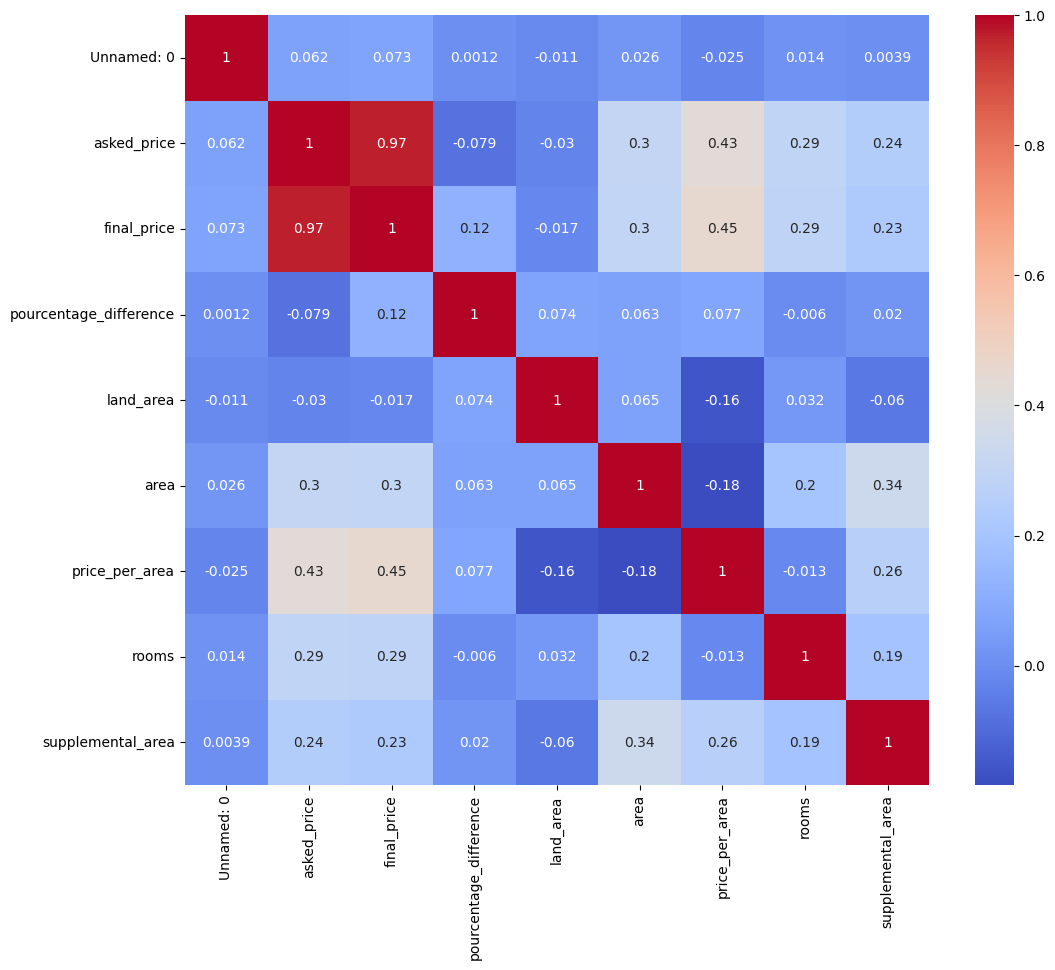

In [8]:
# Data analysis
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


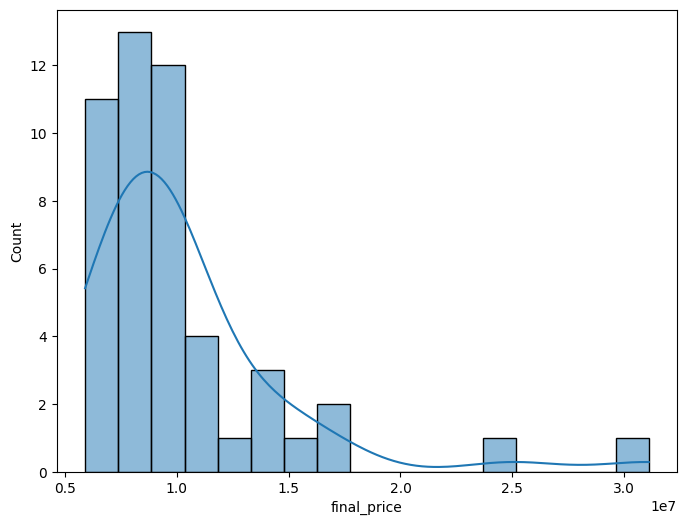

In [9]:
# Plot the distribution of the target variable (final_price)
plt.figure(figsize=(8, 6))
sns.histplot(df_sample["final_price"], kde=True)
plt.show()

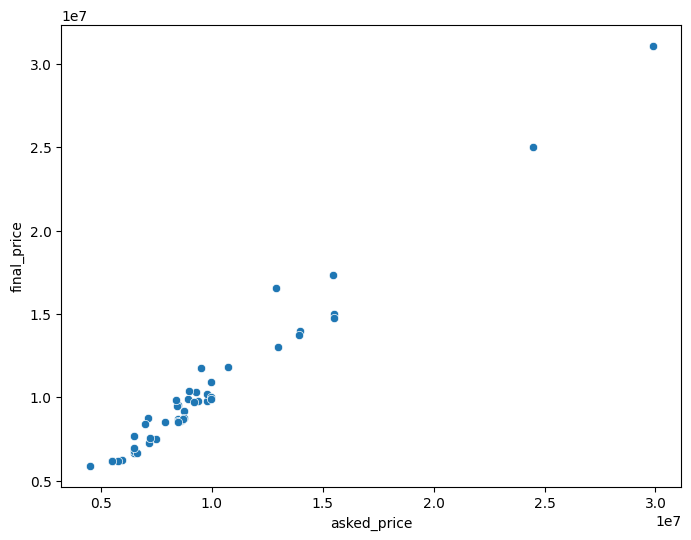

In [10]:
# Plot the relationship between the asked_price and the final_price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="asked_price", y="final_price", data=df_sample)
plt.show()

In [11]:
# Build predictive model
# Define features and target variable
X = df_sample.drop("final_price", axis=1)
y = df_sample["final_price"]

In [12]:

# Split data into training and validation sets (80/20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Choose linear regression as the machine learning algorithm
lr = LinearRegression()


In [14]:
# Train the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Validation
# Predict on the validation set
y_pred = lr.predict(X_val)


In [16]:
# Evaluate the model performance using mean squared error and R-squared score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")

Mean squared error: 175167239487.35
R-squared score: 0.90


In [17]:
# Compare the model with a baseline model (mean value)
y_mean = np.mean(y_val)
y_base = np.full(len(y_val), y_mean)
mse_base = mean_squared_error(y_val, y_base)
r2_base = r2_score(y_val, y_base)
print(f"Mean squared error of baseline model: {mse_base:.2f}")
print(f"R-squared score of baseline model: {r2_base:.2f}")

Mean squared error of baseline model: 1748900000000.00
R-squared score of baseline model: 0.00


In [19]:
y_min = min(y_val)
y_max = max(y_val)


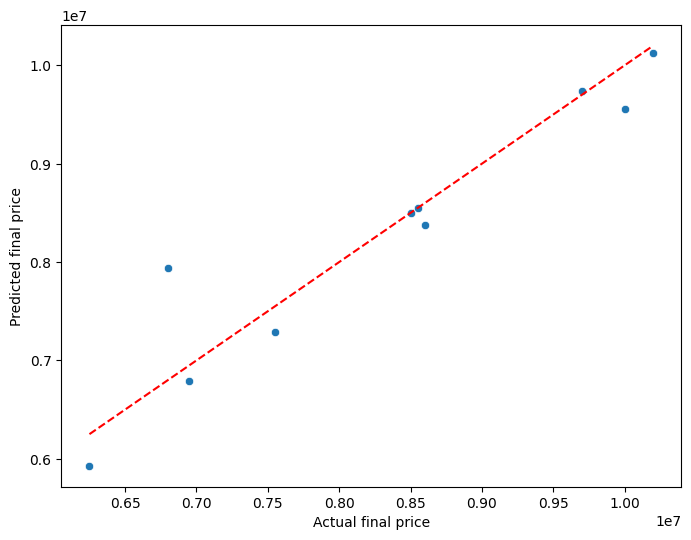

In [20]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred)
plt.plot([y_min, y_max], [y_min, y_max], color="red", linestyle="--")
plt.xlabel("Actual final price")
plt.ylabel("Predicted final price")
plt.show()